# Drawing Basic Sentiment Curves

First part of the project is to extract amplitude values for the windows by using the sentiments. Unfortunately the Syuhzet dictionaries and the method used in the original paper are currently only available for R, thus I will do preliminary demonstration with Python and NLTK only. NLTK reports three distinct sentiments; let's see how they look like.

In [1]:
# Just testing how to reuse modules on Jupyter Notebooks

import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))

from book_analytics import BookAnalytics

ba = BookAnalytics("64317.txt.utf-8", book_path="../static/books")
windows, title = ba.parse()
print(len(windows))
print(windows[50])

[nltk_data] Downloading package names to /home/ahtiah/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ahtiah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Packag

709
{'text': 'Do you see ?” There was something pathetic in his concentration , as if his complacency , more acute than of old , was not enough to him any more . When , almost immediately , the telephone rang inside and the butler left the porch Daisy seized upon the momentary interruption and leaned towards me . “ I ’ ll tell you a family secret ,” she whispered enthusiastically . “ It ’ s about the butler ’ s nose . Do you want to hear about the butler ’ s nose ?”', 'sentiment': {'neg': 0.081, 'neu': 0.859, 'pos': 0.06, 'compound': -0.3939}}


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

[0.19, 0.106, 0.056, 0.0, 0.139, 0.064, 0.261, 0.058, 0.221, 0.108] [0.049, 0.039, 0.056, 0.047, 0.088, 0.073, 0.0, 0.072, 0.133, 0.075] [0.761, 0.856, 0.888, 0.953, 0.772, 0.863, 0.739, 0.87, 0.646, 0.817] [0.8718, 0.7785, -0.0098, -0.3818, 0.7377, -0.1531, 0.979, -0.5719, 0.7957, 0.4817]


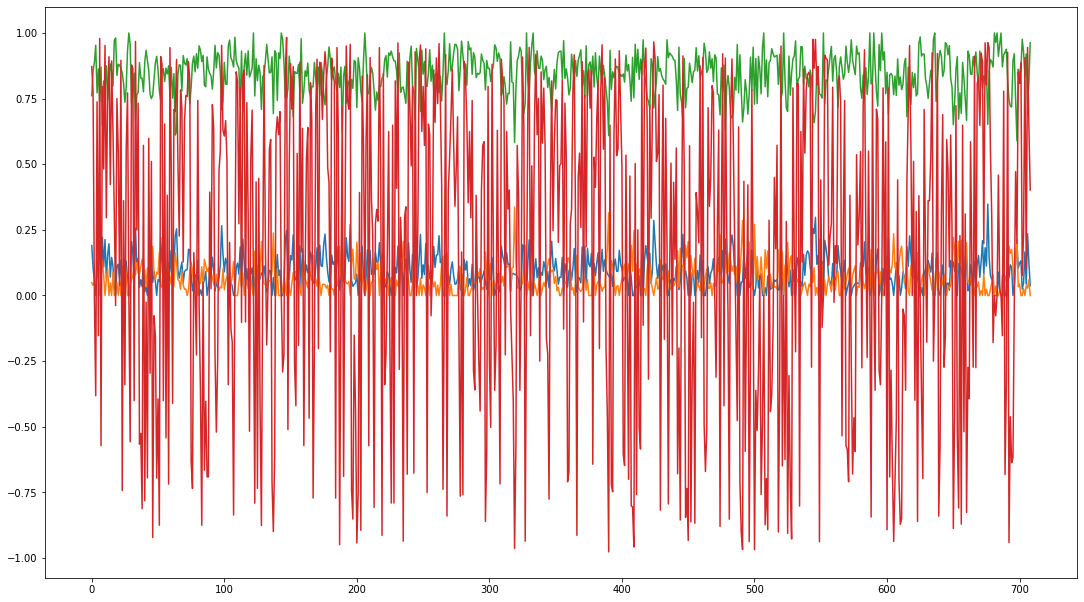

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

pos = []
neg = []
neu = []
compound = []
base = []

for window in windows:
    pos.append(window['sentiment']['pos'])
    neg.append(window['sentiment']['neg'])
    neu.append(window['sentiment']['neu'])
    compound.append(window['sentiment']['compound'])

print(pos[0:10], neg[0:10], neu[0:10], compound[0:10])

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(range(len(pos)), pos, label="Positive")
ax.plot(range(len(pos)), neg, label="Negative")
ax.plot(range(len(pos)), neu, label="Neutral")
ax.plot(range(len(pos)), compound, label="Compound");

## Deeper Investigation

Do we have anything useful here? Let's locate one MICE arc from the data.

171 The moon had risen higher , and floating in the Sound was a triangle of silver scales , trembling a little to the stiff , tinny drip of the banjoes on the lawn . I was still with Jordan Baker . We were sitting at a table with a man of about my age and a rowdy little girl , who gave way upon the slightest provocation to uncontrollable laughter .
172 I was enjoying myself now . I had taken two finger - bowls of champagne , and the scene had changed before my eyes into something significant , elemental , and profound . At a lull in the entertainment the man looked at me and smiled . “ Your face is familiar ,” he said politely . “ Weren ’ t you in the First Division during the war ?” “ Why yes . I was in the Twenty - eighth Infantry .” “ I was in the Sixteenth until June nineteen - eighteen .
173 I knew I ’ d seen you somewhere before .” We talked for a moment about some wet , grey little villages in France . Evidently he lived in this vicinity , for he told me that he had just bought 

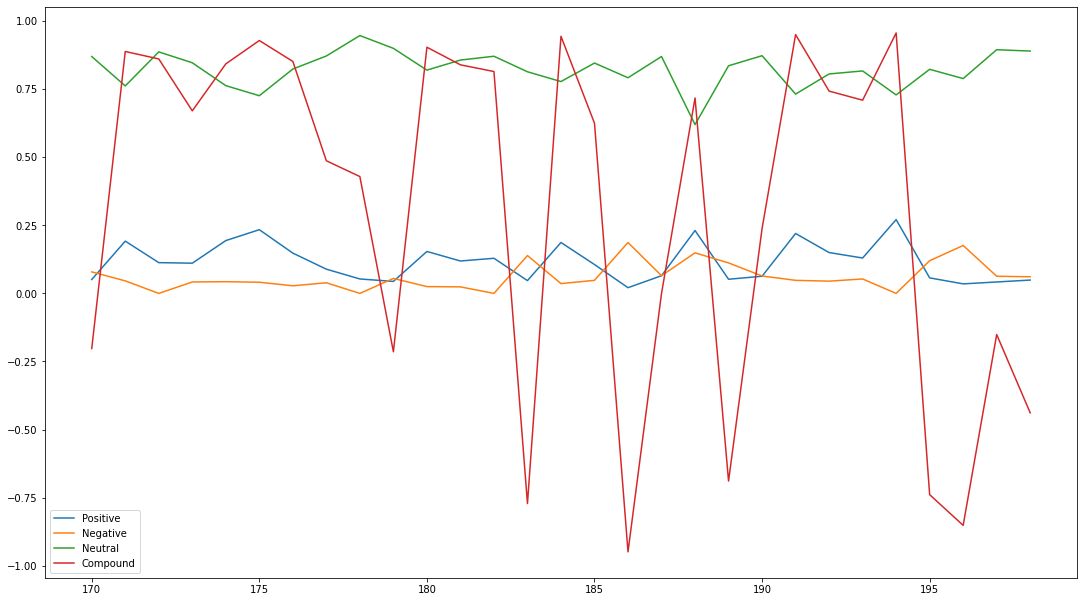

In [5]:
def get_sub(start, end, windows):
    sub_pos = []
    sub_neg = []
    sub_neu = []
    sub_compound = []
    for i in range(len(windows)):
        if i > start and i < end:
            print(i, windows[i]['text'])
            sub_pos.append(windows[i]['sentiment']['pos'])
            sub_neg.append(windows[i]['sentiment']['neg'])
            sub_neu.append(windows[i]['sentiment']['neu'])
            sub_compound.append(windows[i]['sentiment']['compound'])
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(range(start, start + len(sub_pos)), sub_pos, label="Positive")
    ax.plot(range(start, start + len(sub_neg)), sub_neg, label="Negative")
    ax.plot(range(start, start + len(sub_neu)), sub_neu, label="Neutral")
    ax.plot(range(start, start + len(sub_compound)), sub_compound, label="Compound");
    ax.legend()

get_sub(170, 200, windows)